## **Project Name:** Petrol Price Forecasting  using Tensor Flow and Auto Keras

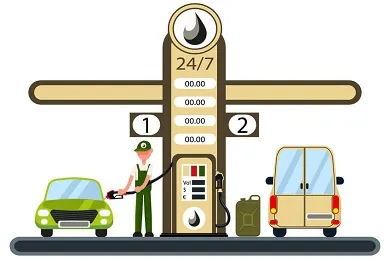

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

### We will use LSTM and ARIMA forecasting models to predict the prices then we will see how we can implement the same using Auto Keras, which is an Auto ML Library.

## TimeLine of the project:
- Data Analysis
- Model Building and predictions using ML techniques
- Model Building and prediction using Auto Keras(Auto ML)

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/Petrol+Price+Forecasting-+Auto+Kearas/train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [6]:
df1.head()
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [7]:
df2 = df1.dropna()

In [8]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [11]:
import plotly.express as px
fig = px.scatter(x=df2.Date, y=df2.Petrol)
fig.show()

In [12]:
df3=df2[df2.Petrol<160]
fig = px.scatter(x=df3.Date, y=df3.Petrol)
fig.show()


In [13]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [11]:
df4[0:10]

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888]])

In [15]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [16]:
print(train_data.shape)
print(test_data.shape)

(525, 1)
(284, 1)


**Data Preprocessing**

In [17]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [17]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [19]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

# LSTM 

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 17s 758ms/step - loss: 0.1334 - val_loss: 0.0871
Epoch 2/100
7/7 [==============================] - 3s 410ms/step - loss: 0.0297 - val_loss: 0.0205
Epoch 3/100
7/7 [==============================] - 3s 381ms/step - loss: 0.0211 - val_loss: 0.0043
Epoch 4/100
7/7 [==============================] - 3s 376ms/step - loss: 0.0109 - val_loss: 0.0065
Epoch 5/100
7/7 [==============================] - 3s 376ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 6/100
7/7 [==============================] - 2s 335ms/step - loss: 0.0075 - val_loss: 0.0043
Epoch 7/100
7/7 [==============================] - 2s 345ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 8/100
7/7 [==============================] - 2s 265ms/step - loss: 0.0060 - val_loss: 0.0030
Epoch 9/100
7/7 [==============================] - 1s 198ms/step - loss: 0.0058 - val_loss: 0.0034
Epoch 10/100
7/7 [==============================] - 1s 195ms/step - loss: 0.0057 - val_loss: 0.0029
Epoch 11

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

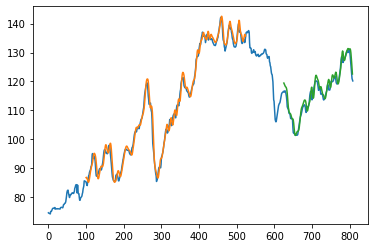

In [24]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
df_test=pd.read_csv("/content/drive/MyDrive/Petrol+Price+Forecasting-+Auto+Kearas/test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [26]:
model.save("prtrol price prediction")

INFO:tensorflow:Assets written to: prtrol price prediction/assets


INFO:tensorflow:Assets written to: prtrol price prediction/assets


## **Using ARIMA**

In [27]:
!pip install --upgrade patsy

In [31]:
pip install statsmodels

In [29]:
!pip install --upgrade --no-deps statsmodels

  Using cached statsmodels-0.13.2.tar.gz (17.9 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [33]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [34]:
df = pd.read_csv("/content/drive/MyDrive/Petrol+Price+Forecasting-+Auto+Kearas/train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [35]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [36]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [37]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [40]:
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [38]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

(array([119.82692174, 119.57463623, 119.39905793, 119.28423516,
        119.21166681, 119.17013079, 119.15225034, 119.15224172,
        119.16567806, 119.18919529, 119.22027298, 119.25702896,
        119.29805054, 119.34227587, 119.38890711, 119.43734505,
        119.48713977, 119.53795341, 119.58953226, 119.64168575,
        119.69427079, 119.74717992, 119.80033243, 119.85366771,
        119.90714026, 119.96071588, 120.01436892, 120.06808009,
        120.12183492, 120.17562254]),
 array([0.62715362, 1.20388708, 1.74478785, 2.25846805, 2.74675597,
        3.2116405 , 3.65310842, 4.07154515, 4.46820798, 4.84470166,
        5.20269989, 5.54382156, 5.86958352, 6.18138225, 6.48048633,
        6.76803752, 7.04505755, 7.31245769, 7.57104936, 7.82155473,
        8.06461681, 8.30080868, 8.53064192, 8.75457406, 8.97301518,
        9.18633371, 9.3948615 , 9.5988982 , 9.79871511, 9.99455851]),
 array([[118.59772324, 121.05612024],
        [117.21506091, 121.93421155],
        [115.97933658, 122.8

# Using Auto ML

 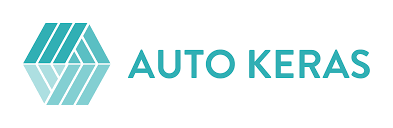

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [42]:
!pip install git+https://github.com/keras-team/keras-tuner.git

  Cloning https://github.com/keras-team/keras-tuner.git to /tmp/pip-req-build-auj7mq6g
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-auj7mq6g
  Created wheel for keras-tuner: filename=keras_tuner-master-py3-none-any.whl size=132636 sha256=935359eec9712eb36de502c9611a8275198df4a1765fc072865bdd7e745e4367
  Stored in directory: /tmp/pip-ephem-wheel-cache-2cqstq8_/wheels/e1/66/9f/f6c4d78f995ffaab8f76f55725a28cdcaa9b25910f7ac0326a
Failed to build keras-tuner
    Running setup.py install for keras-tuner ... done
  DEPRECATION: keras-tuner was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [43]:
!pip install autokeras

     |████████████████████████████████| 160 kB 13.5 MB/s 
     |████████████████████████████████| 98 kB 7.3 MB/s 
     |████████████████████████████████| 497.5 MB 22 kB/s 
     |████████████████████████████████| 5.8 MB 11.4 MB/s 
     |████████████████████████████████| 1.4 MB 41.9 MB/s 
     |████████████████████████████████| 462 kB 68.9 MB/s 
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
  

In [1]:
!pip show autokeras

Name: autokeras
Version: 1.0.17
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras-tuner, pandas, packaging, tensorflow
Required-by: 


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [3]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [22]:
X_train = pd.DataFrame(X_train)

In [23]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.005592,0.003826,0.003090,0.002060,0.001030,0.000000,0.012655,0.013096,0.013390,0.018099,0.023543,0.027075,0.028252,0.029723,0.029282,0.028546,0.027516,0.032666,0.024868,0.027075,0.026339,0.026339,0.025456,0.025309,0.026633,0.026339,0.025898,0.025750,0.025162,0.025456,0.024573,0.024868,0.031636,0.032813,0.033402,0.033696,0.032813,0.031931,0.031048,0.037081,...,0.097852,0.102560,0.103590,0.107416,0.107710,0.105356,0.104473,0.104032,0.109182,0.115362,0.130959,0.134491,0.143172,0.148028,0.149058,0.147881,0.106680,0.146557,0.144938,0.106680,0.102855,0.102413,0.082843,0.069453,0.069453,0.078428,0.082843,0.085639,0.087404,0.091819,0.102266,0.109329,0.124926,0.135227,0.142731,0.167746,0.168040,0.166274,0.165244,0.164067
1,0.003826,0.003090,0.002060,0.001030,0.000000,0.012655,0.013096,0.013390,0.018099,0.023543,0.027075,0.028252,0.029723,0.029282,0.028546,0.027516,0.032666,0.024868,0.027075,0.026339,0.026339,0.025456,0.025309,0.026633,0.026339,0.025898,0.025750,0.025162,0.025456,0.024573,0.024868,0.031636,0.032813,0.033402,0.033696,0.032813,0.031931,0.031048,0.037081,0.046792,...,0.102560,0.103590,0.107416,0.107710,0.105356,0.104473,0.104032,0.109182,0.115362,0.130959,0.134491,0.143172,0.148028,0.149058,0.147881,0.106680,0.146557,0.144938,0.106680,0.102855,0.102413,0.082843,0.069453,0.069453,0.078428,0.082843,0.085639,0.087404,0.091819,0.102266,0.109329,0.124926,0.135227,0.142731,0.167746,0.168040,0.166274,0.165244,0.164067,0.162743
2,0.003090,0.002060,0.001030,0.000000,0.012655,0.013096,0.013390,0.018099,0.023543,0.027075,0.028252,0.029723,0.029282,0.028546,0.027516,0.032666,0.024868,0.027075,0.026339,0.026339,0.025456,0.025309,0.026633,0.026339,0.025898,0.025750,0.025162,0.025456,0.024573,0.024868,0.031636,0.032813,0.033402,0.033696,0.032813,0.031931,0.031048,0.037081,0.046792,0.047528,...,0.103590,0.107416,0.107710,0.105356,0.104473,0.104032,0.109182,0.115362,0.130959,0.134491,0.143172,0.148028,0.149058,0.147881,0.106680,0.146557,0.144938,0.106680,0.102855,0.102413,0.082843,0.069453,0.069453,0.078428,0.082843,0.085639,0.087404,0.091819,0.102266,0.109329,0.124926,0.135227,0.142731,0.167746,0.168040,0.166274,0.165244,0.164067,0.162743,0.155386
3,0.002060,0.001030,0.000000,0.012655,0.013096,0.013390,0.018099,0.023543,0.027075,0.028252,0.029723,0.029282,0.028546,0.027516,0.032666,0.024868,0.027075,0.026339,0.026339,0.025456,0.025309,0.026633,0.026339,0.025898,0.025750,0.025162,0.025456,0.024573,0.024868,0.031636,0.032813,0.033402,0.033696,0.032813,0.031931,0.031048,0.037081,0.046792,0.047528,0.049735,...,0.107416,0.107710,0.105356,0.104473,0.104032,0.109182,0.115362,0.130959,0.134491,0.143172,0.148028,0.149058,0.147881,0.106680,0.146557,0.144938,0.106680,0.102855,0.102413,0.082843,0.069453,0.069453,0.078428,0.082843,0.085639,0.087404,0.091819,0.102266,0.109329,0.124926,0.135227,0.142731,0.167746,0.168040,0.166274,0.165244,0.164067,0.162743,0.155386,0.146704
4,0.001030,0.000000,0.012655,0.013096,0.013390,0.018099,0.023543,0.027075,0.028252,0.029723,0.029282,0.028546,0.027516,0.032666,0.024868,0.027075,0.026339,0.026339,0.025456,0.025309,0.026633,0.026339,0.025898,0.025750,0.025162,0.025456,0.024573,0.024868,0.031636,0.032813,0.033402,0.033696,0.032813,0.031931,0.031048,0.037081,0.046792,0.047528,0.049735,0.053708,...,0.107710,0.105356,0.104473,0.104032,0.109182,0.115362,0.130959,0.134491,0.143172,0.148028,0.149058,0.147881,0.106680,0.146557,0.144938,0.106680,0.102855,0.102413,0.082843,0.069453,0.069453,0.078428,0.082843,0.085639,0.087404,0.091819,0.102266,0.109329,0.124926,0.135227,0.142731,0.167746,0.168040,0.166274,0.165244,0.164067,0.162743,0.155386,0.146704,0.144202


In [24]:
y_train = pd.DataFrame(y_train)

In [25]:
reg.fit(x=X_train, y=y_train, verbose=0)

INFO:tensorflow:Oracle triggered exit
14/14 [==============================] - 1s 4ms/step - loss: 0.1928 - mean_squared_error: 0.1928
INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


In [26]:
X_test = pd.DataFrame(X_test)

In [28]:
ytest = pd.DataFrame(ytest)

In [29]:

# evaluate the model
mae, _  = reg.evaluate(X_test, ytest, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()


6/6 [==============================] - 0s 5ms/step


In [30]:
# summarize the loaded model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 multi_category_encoding_4 (  (None, 100)              0         
 MultiCategoryEncoding)                                          
                                                                 
 normalization_3 (Normalizat  (None, 100)              201       
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 32)                3232      
                                                                 
 re_lu_8 (ReLU)              (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                1056

In [31]:
yhat_train= reg.predict(X_train)

14/14 [==============================] - 0s 3ms/step


In [32]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(ytest,yhat_test)

0.07284212362393204

In [35]:
mean_squared_error(y_train,yhat_train)

0.3199791706924925